***Phase 1: Data Exploration and Preparation  ***

**1.1 Data Exploration (LO1)**

Bitcoin dataset is used here for preparing and finding the price of the bitcoin. Each step in this is very important to make sure that the data is clean and has useful data which is ready for analysing.


**1. Find the Relevant Features**

The most important features need to be identified, to find the price of the Bitcoin. The dataset will be having the columns like the Open, High, Low, Close, Volume, and possibly others like Currency. Features like Open, High, Low, and Volume are related to price changes directly which can provide useful insights into the patterns which affects the closing price of the Bitcoin. For streamlining the analysis and modeling the process, the features need to be found in the early stage itself for streamlining the modeling process and for analysing.

**2. Visualize Price Data Over Time**

Visualization is very important for knowing the trends and patterns in the dataset. A line plot of Close prices over time can be used to find the trends like whether the Bitcoin prices are increasing or decreasing over the time or seasonally like repeated patterns at regular intervals or potential outliers like unusually high price or low price. For instance, spikes in price will be denoting the major market events. This step helps to grasp the overall behavior of Bitcoin prices and prepare for analyse in future.


**3. Find the Descriptive Statistics**

Descriptive statistics summarize the dataset’s key characteristics:
Numerical Features: Values like mean, median and standard deviation can be used to find the central tendency and variability of features like the Open, High, Low, Close and Volume. For example, the mean and median of Close prices will be providing the insights like the average prices. The standard deviation denotes the volatility of the price.
Categorical Features: If the dataset has categorical features like Currency, a frequency distribution shows the occurrence of each category.

**4. Check for Empty Values**

Empty values may affect the analysis and predictions. For finding the empty values, one need to find the number of missing values for each column. If missing values are available then the techniques can be used for managing them are listed below:
Imputation: Missing numerical values can be replaced with the central value like the median.
Removal: The rows or columns can be removed with important missing data if their absence does not affect the analysis.
After managing the missing values, check that no missing data remains to make sure the dataset is available for next steps.

**5. Find the Outliers**

Outliers can affect the analysis and predictions. With the help of boxplots for numerical values like the Open, High, Low, Close and Volume shows that the values which affects the normal range. These outliers shows that the data entry errors or unusual market behavior will be available for analysis or handled based on their relevance.



Columns in Bitcoin dataset:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


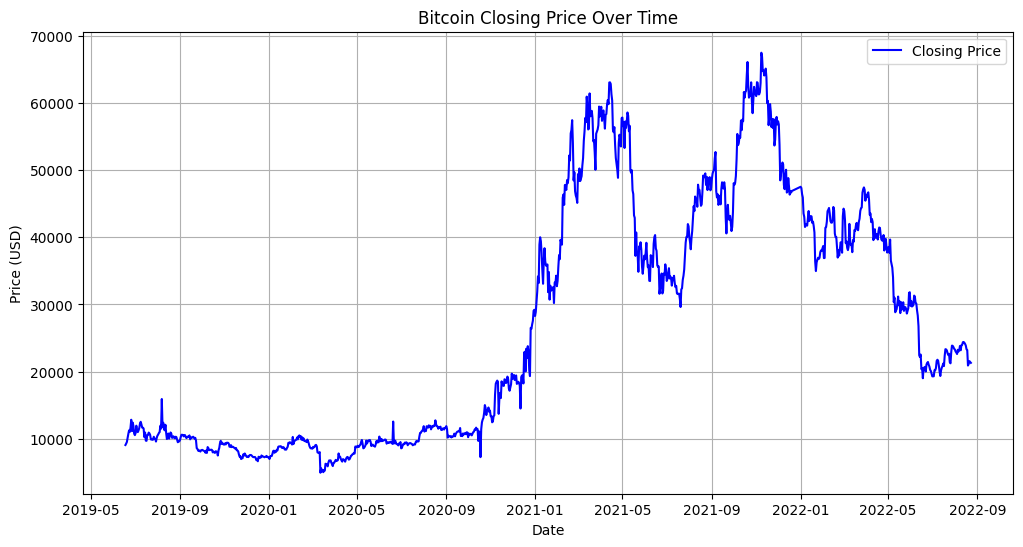


Descriptive Statistics (Numerical Features):
               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.822266  20245.201172  20902.404297  1.864334e+06
75%    41782.333984  42749.439453  40890.394531  41782.333984  4.076471e+07
max    67470.437500  85563.984375  66072.343750  67502.421875  5.791706e+08

Frequency Distribution (Currency):
Currency
USD    1151
Name: count, dtype: int64

Missing Values in Bitcoin Dataset:
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

Missing Values After Handling:
Date    

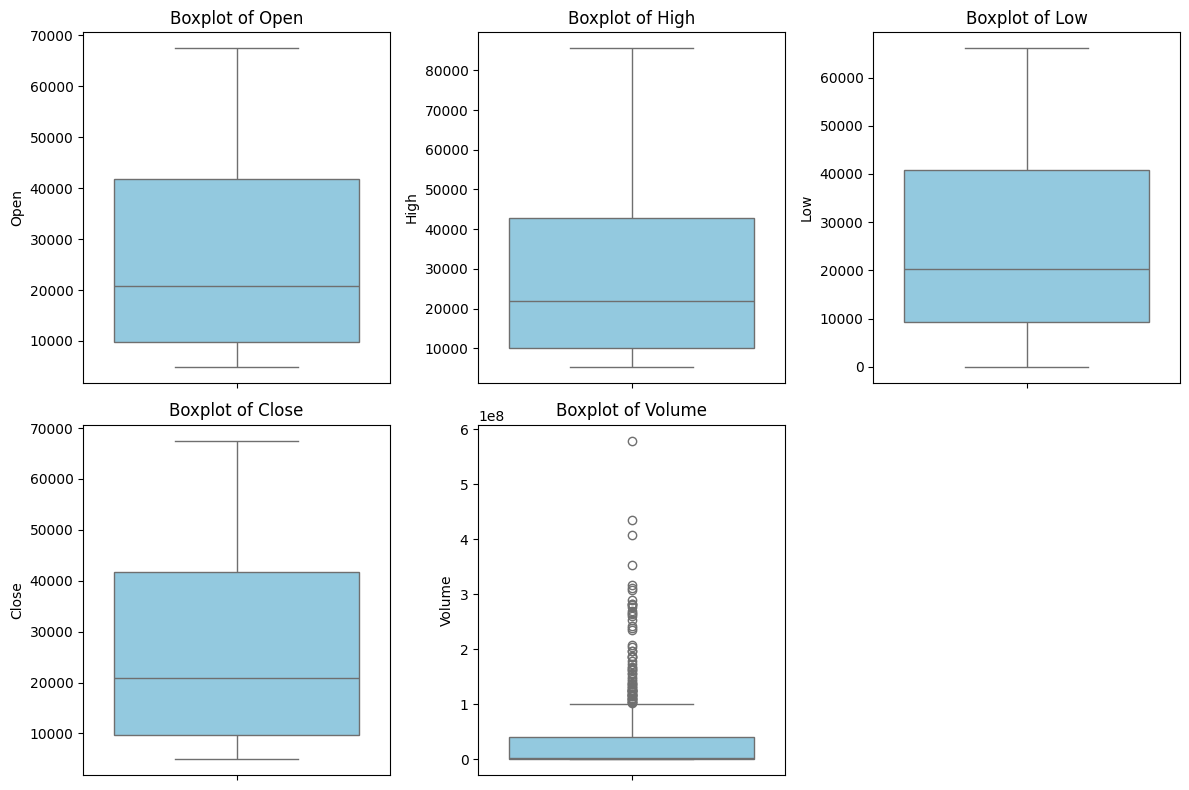

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Bitcoin dataset
bitcoin_data = pd.read_csv('Bitcoin.csv')

# Convert the 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Sort by Date for time series analysis
bitcoin_data.sort_values(by='Date', inplace=True)

# 1. Identify Relevant Features
# Printing the column names
print("Columns in Bitcoin dataset:")
print(bitcoin_data.columns)

# 2. Visualize the price data over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

# 3. Calculate Descriptive Statistics
# Descriptive statistics for numerical features
print("\nDescriptive Statistics (Numerical Features):")
print(bitcoin_data[['Open', 'High', 'Low', 'Close', 'Volume']].describe())

# Frequency distribution for categorical features
print("\nFrequency Distribution (Currency):")
print(bitcoin_data['Currency'].value_counts())

# 4. Check for Missing Values
missing_values = bitcoin_data.isnull().sum()
print("\nMissing Values in Bitcoin Dataset:")
print(missing_values)

# Handle Missing Values (if any)
# Option 1: Impute missing numerical values with the median
numeric_columns = bitcoin_data.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns only
bitcoin_data[numeric_columns] = bitcoin_data[numeric_columns].fillna(bitcoin_data[numeric_columns].median())

# Option 2: Drop rows with missing values (if necessary)
# bitcoin_data.dropna(inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Handling:")
print(bitcoin_data.isnull().sum())

# 5. Highlighting potential outliers using boxplots
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=bitcoin_data, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



The price data over time is potential outliers which has unusually high or low prices.

**1.2 Data Preprocessing**

**1. Defining the Target Variable**

The target variable denotes the future Bitcoin price that is to be predicted. In this situation, the closing price is the target in the next time window. To find this, we shift the Close column by one row using .shift(-1). This operation aligns the current row's features with the next row's closing price as the target. By performing this, we can train the model to predict the closing price based on the current market situations. The last row in the dataset will be having no future price so we can drop it using .dropna() to make sure there are no empty values in the targetted variable.

***2. Selecting Relevant Features ***

From the exploration phase, we will be choosing the features which are near to the prediction of the price like the Open, High, Low, Close, and Volume. These features will be providing a view of market activity. For example:
Open: Price at the beginning of the day.
High and Low: The highest and lowest prices during the day.
Close: The price at the end of the day.
Volume: The number of trades.

**3. Feature Engineering**

Feature engineering makes sure that the dataset by creating new features from old ones. Two new features are listed below:
Price Change: The difference between the current closing price (Close) and the old closing price are found using .diff(). This denotes that the daily price movement and helps to find the trends.
Price Spread: The difference between the high price and low prices are found by subtracting the high and low values like: High - Low. This shows the volatility of the market for a certain day.
These extra features finds the valuable patterns which enhances the performance of the modal.

**4. Handling Missing Values**

Empty values happens during feature engineering like when finding the change in price. These missing values are occupied with 0 as a simple technique to make sure the dataset is complete. Another techniques like median imputation can be used based on the dataset nature.

**5. Scaling the Features**

Scaling makes sure that all the features have a common range, which enhances the performance of the model and stability of the model. For example, Volume and Price values may have big different scales. We will be using the StandardScaler to standardize the features which transforms them to have a mean of 0 and a standard deviation of 1. This avoids problems where the larger-scale features dominate smaller ones during training the model.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Bitcoin dataset
bitcoin_data = pd.read_csv('Bitcoin.csv')

# Convert the 'Date' column to datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Sort by Date for time series analysis
bitcoin_data.sort_values(by='Date', inplace=True)

# Step 1: Define the Target Variable
# Defining the target as the closing price in the next time window
bitcoin_data['Future_Close'] = bitcoin_data['Close'].shift(-1)  # Shift the 'Close' column to get future price
bitcoin_data.dropna(subset=['Future_Close'], inplace=True)  # Drop the last row which has NaN target

# Step 2: Select Relevant Features
# Using 'Open', 'High', 'Low', 'Close', 'Volume' as relevant features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = bitcoin_data[features]

# Step 3: Feature Engineering
# Price change: Difference between the current 'Close' and previous 'Close'
bitcoin_data['Price_Change'] = bitcoin_data['Close'].diff()
# Price spread: Difference between 'High' and 'Low'
bitcoin_data['Price_Spread'] = bitcoin_data['High'] - bitcoin_data['Low']

# Add new features to the feature set
X = bitcoin_data[features + ['Price_Change', 'Price_Spread']]

# Step 4: Define the Target Variable (Future Close Price)
y = bitcoin_data['Future_Close']

# Step 5: Handle Missing Values
X = X.fillna(0)  # Fill missing values with 0 or you could use median/imputation techniques if necessary

# Step 6: Feature Scaling
# Use StandardScaler to standardize the features to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the processed data
print(f"Scaled Features:\n{X_scaled[:5]}")  # Display first 5 rows of the scaled features
print(f"Target Variable (Future Close):\n{y.head()}")  # Display the target variable

# Now the data is ready for model training (you can proceed with splitting the data into training and testing sets)



Scaled Features:
[[-0.96673084 -0.99739196 -0.93979805 -0.97146431 -0.53447503 -0.00802609
  -0.52257258]
 [-0.97007641 -0.9904522  -0.93622406 -0.95979873 -0.55027045  0.14661599
  -0.50506071]
 [-0.95875321 -0.97439257 -0.92716889 -0.94599817 -0.55119355  0.17491799
  -0.46820673]
 [-0.94454209 -0.94416011 -0.90901436 -0.91208462 -0.55132473  0.44154144
  -0.40401405]
 [-0.90974415 -0.88773239 -0.87719385 -0.87910772 -0.551166    0.42912478
  -0.27454078]]
Target Variable (Future Close):
0     9271.459961
1     9519.200195
2    10127.998047
3    10719.981445
4    11246.518555
Name: Future_Close, dtype: float64


**Phase 2: Feature Selection**

**2.1 Feature Selection Techniques**

Feature selection techniques can be used to find the most relevant features from a dataset to enhance the performance of the model and decrease the computational complexity. There are three common techniques like the filter methods, wrapper methods and embedded methods. Each has different characteristics and use cases which are described below with a practical implementation and comparison.



Correlation with Target:
 Close     1.000000
Open      0.997138
Low       0.993507
High      0.987691
Volume    0.596837
Name: Close, dtype: float64


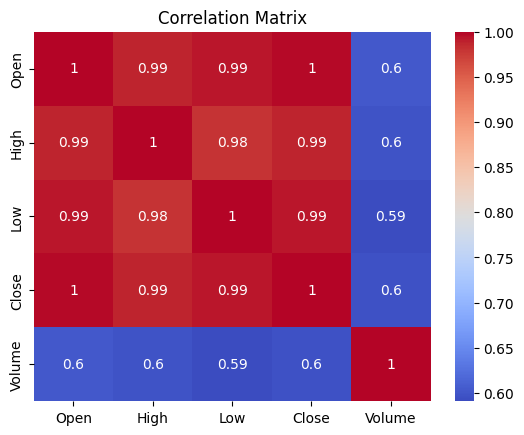

Top Features by Correlation: ['Close', 'Open', 'Low', 'High', 'Volume']

RFE Feature Ranking:
   Feature  Rank
0    Open     1
1    High     1
3   Close     1
2     Low     2
4  Volume     3


<ipython-input-43-4ed2370d04c1>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Feature', data=rfe_ranking, palette='viridis')


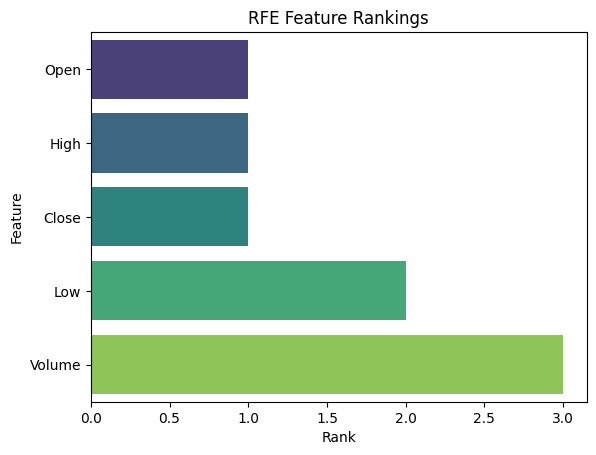


LASSO Coefficients:
   Feature   Coefficient
3   Close  1.008739e+00
2     Low  1.429284e-02
1    High  1.144553e-04
4  Volume  9.853614e-08
0    Open -2.290961e-02


<ipython-input-43-4ed2370d04c1>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='Blues')


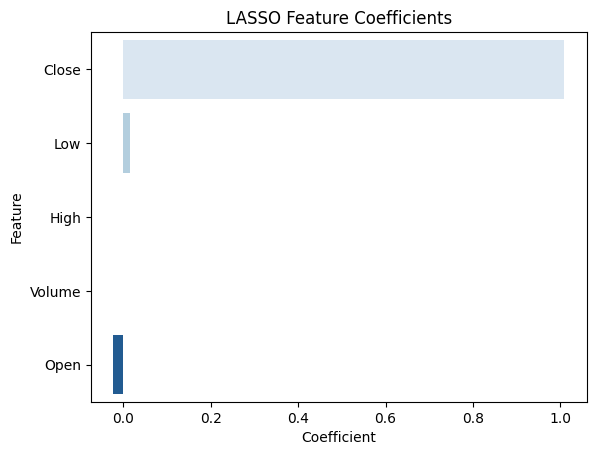


Selected Features by Filter (Correlation): ['Close', 'Open', 'Low', 'High', 'Volume']
Selected Features by Wrapper (RFE): ['Open', 'High', 'Low']
Selected Features by Embedded (LASSO): ['Close', 'Low', 'High', 'Volume', 'Open']
All Features - MSE: 47987.8624
Filter (Correlation) - MSE: 47279.0556
Wrapper (RFE) - MSE: 1188746.1083
Embedded (LASSO) - MSE: 47209.9303


<ipython-input-43-4ed2370d04c1>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Method', data=results_df, palette='magma')


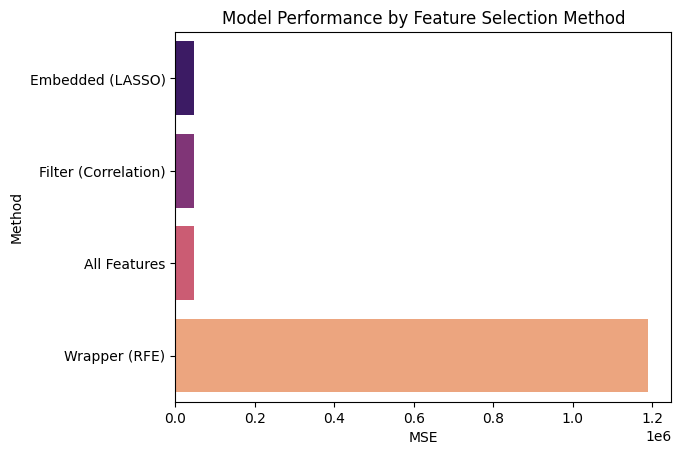

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Replace 'bitcoin.csv' with the actual path to your dataset
data = pd.read_csv("Bitcoin.csv")

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Currency'], errors='ignore')

# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'  # Assume 'Close' is the target variable

X = data[features].values
y = data[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Phase 2.1: Feature Selection Techniques

# 1. Filter Methods: Correlation with the target variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print("Correlation with Target:\n", correlation_with_target)

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Select top features based on correlation (threshold: 0.5)
top_features_correlation = correlation_with_target[correlation_with_target.abs() > 0.5].index.tolist()
print("Top Features by Correlation:", top_features_correlation)

# 2. Wrapper Methods: Recursive Feature Elimination (RFE)
rf_model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=3)
rfe.fit(X_train, y_train)

rfe_ranking = pd.DataFrame({'Feature': features, 'Rank': rfe.ranking_}).sort_values(by='Rank')
print("\nRFE Feature Ranking:\n", rfe_ranking)

# Plot RFE rankings
sns.barplot(x='Rank', y='Feature', data=rfe_ranking, palette='viridis')
plt.title("RFE Feature Rankings")
plt.show()

# 3. Embedded Methods: LASSO Regression
lasso = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

lasso_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)
print("\nLASSO Coefficients:\n", lasso_coefficients)

# Plot LASSO coefficients
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='Blues')
plt.title("LASSO Feature Coefficients")
plt.show()

# Compare Selected Features
print("\nSelected Features by Filter (Correlation):", top_features_correlation)
print("Selected Features by Wrapper (RFE):", rfe_ranking.loc[rfe.support_, 'Feature'].tolist())
print("Selected Features by Embedded (LASSO):", lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist())

# Evaluate each feature selection method
# Create subsets for comparison
feature_sets = {
    "All Features": features,
    "Filter (Correlation)": top_features_correlation,
    "Wrapper (RFE)": rfe_ranking.loc[rfe.support_, 'Feature'].tolist(),
    "Embedded (LASSO)": lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist()
}

# Train and evaluate a model for each feature subset
results = []
for method, selected_features in feature_sets.items():
    selected_columns = [features.index(f) for f in selected_features]
    X_train_subset = X_train[:, selected_columns]
    X_test_subset = X_test[:, selected_columns]

    rf_model.fit(X_train_subset, y_train)
    y_pred = rf_model.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    results.append((method, mse))
    print(f"{method} - MSE: {mse:.4f}")

# Visualize the results
results_df = pd.DataFrame(results, columns=['Method', 'MSE']).sort_values(by='MSE')
sns.barplot(x='MSE', y='Method', data=results_df, palette='magma')
plt.title("Model Performance by Feature Selection Method")
plt.show()


Feature selection method can find the features from the dataset for enhancing the performance of the model and decrease the computational complexity. There are three common techniques and they are filter methods, wrapper methods and embedded methods. Each technique will be having different characteristics and use cases.

**Filter Methods**

By using the statistical measures, filter methods will be finding the relationship between each feature and the target variable. Common methods are correlation, Information Gain and the chi-square test. We will be finding the correlation of features with the target variable 'Close':
The correlation matrix is found to know the relationships between variables.
Features which has correlation values with above 0.5 threshold are chosen.
In the implementation, all the features like 'Open,' 'High,' 'Low,' and 'Volume' will be providing an important correlation with the target. All these were chosen at initial stage.

**Wrapper Methods**

Wrapper methods will be finding the subsets of the feature in an iterative manner. A popular technique is Recursive Feature Elimination (RFE), which uses the performance of the model and removes the lowest important features.
Example:
For ranking the features a random forest was used.
RFE will be having three features like 'Open,' 'High' and 'Low.'
RFE will be providing more robust feature ranking. It will be more cost for large datasets or while using complex models. The chosen features depends on the model which are being used.

**Embedded Methods**

Embedded techniques will be selecting the features during training the model. LASSO regression is the mostly used embedded technique which will be penalizing lower important features by shrinking the coefficients to zero.
In the implementation:
LASSO regression have highlighted the 'Close,' 'Low,' 'High,' and 'Volume' as important features while decreasing the weight of 'Open.'
Embedded techniques are efficient and avoids the overfitting by regularizing the model. They need careful tuning of hyperparameters like the regularization strength in LASSO.

**Comparison of Techniques**

For comparing these techniques, feature subsets are used to train the models.
All features acts as the baseline.
Filter technique features decreases the the Mean Squared Error (MSE).
Due to possible overfitting or underfitting, wrapper method features (RFE) will be providing a lower results.
Embedded method techniques (LASSO) have showed the best performance by achieving the lowest MSE.
The comparison will be suggesting that the LASSO regression provides the most reliable feature subset for this dataset because it will be balancing the performance and features.



***Phase 3: Model Training and Evaluation ***

**3.1 Model Selection and Training**


Correlation with Target:
 Close     1.000000
Open      0.997138
Low       0.993507
High      0.987691
Volume    0.596837
Name: Close, dtype: float64


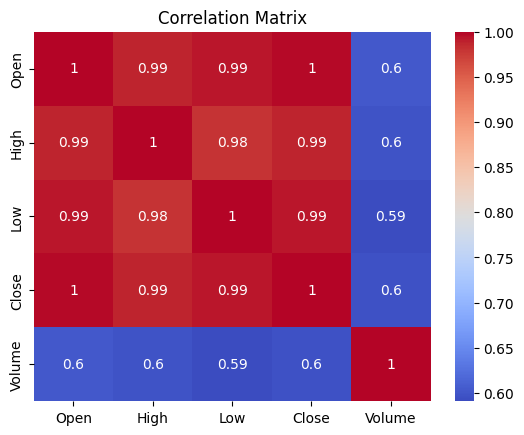

Top Features by Correlation: ['Close', 'Open', 'Low', 'High', 'Volume']

RFE Feature Ranking:
   Feature  Rank
0    Open     1
1    High     1
3   Close     1
2     Low     2
4  Volume     3


<ipython-input-2-8f9e719eef75>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rank', y='Feature', data=rfe_ranking, palette='viridis')


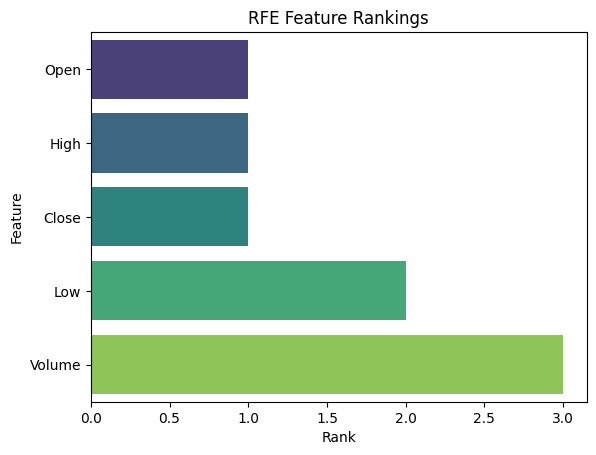


LASSO Coefficients:
   Feature   Coefficient
3   Close  1.008739e+00
2     Low  1.429284e-02
1    High  1.144553e-04
4  Volume  9.853614e-08
0    Open -2.290961e-02


<ipython-input-2-8f9e719eef75>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='Blues')


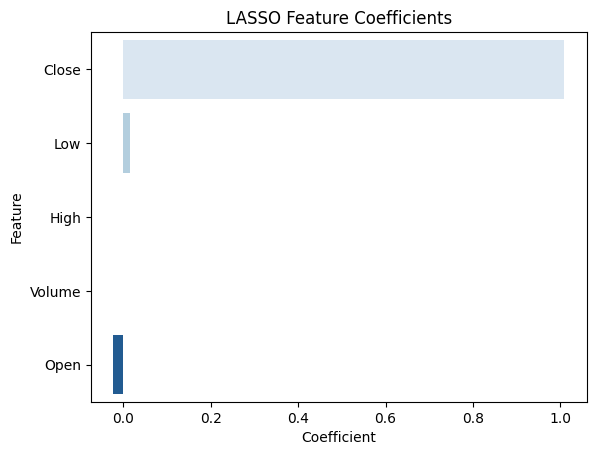


Selected Features by Filter (Correlation): ['Close', 'Open', 'Low', 'High', 'Volume']
Selected Features by Wrapper (RFE): ['Open', 'High', 'Low']
Selected Features by Embedded (LASSO): ['Close', 'Low', 'High', 'Volume', 'Open']
All Features - MSE: 47987.8624
Filter (Correlation) - MSE: 47279.0556
Wrapper (RFE) - MSE: 1188746.1083
Embedded (LASSO) - MSE: 47209.9303


<ipython-input-2-8f9e719eef75>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MSE', y='Method', data=results_df, palette='magma')


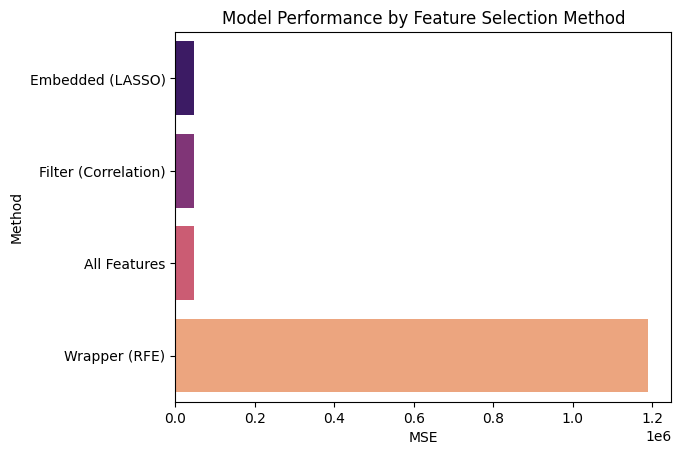

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Replace 'bitcoin.csv' with the actual path to your dataset
data = pd.read_csv("Bitcoin.csv")

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Currency'], errors='ignore')

# Define features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'  # Assume 'Close' is the target variable

X = data[features].values
y = data[target].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Phase 2.1: Feature Selection Techniques

# 1. Filter Methods: Correlation with the target variable
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)
print("Correlation with Target:\n", correlation_with_target)

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Select top features based on correlation (threshold: 0.5)
top_features_correlation = correlation_with_target[correlation_with_target.abs() > 0.5].index.tolist()
print("Top Features by Correlation:", top_features_correlation)

# 2. Wrapper Methods: Recursive Feature Elimination (RFE)
rf_model = RandomForestRegressor(random_state=42)
rfe = RFE(estimator=rf_model, n_features_to_select=3)
rfe.fit(X_train, y_train)

rfe_ranking = pd.DataFrame({'Feature': features, 'Rank': rfe.ranking_}).sort_values(by='Rank')
print("\nRFE Feature Ranking:\n", rfe_ranking)

# Plot RFE rankings
sns.barplot(x='Rank', y='Feature', data=rfe_ranking, palette='viridis')
plt.title("RFE Feature Rankings")
plt.show()

# 3. Embedded Methods: LASSO Regression
lasso = Lasso(alpha=0.01, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

lasso_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lasso.coef_}).sort_values(by='Coefficient', ascending=False)
print("\nLASSO Coefficients:\n", lasso_coefficients)

# Plot LASSO coefficients
sns.barplot(x='Coefficient', y='Feature', data=lasso_coefficients, palette='Blues')
plt.title("LASSO Feature Coefficients")
plt.show()

# Compare Selected Features
print("\nSelected Features by Filter (Correlation):", top_features_correlation)
print("Selected Features by Wrapper (RFE):", rfe_ranking.loc[rfe.support_, 'Feature'].tolist())
print("Selected Features by Embedded (LASSO):", lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist())

# Evaluate each feature selection method
# Create subsets for comparison
feature_sets = {
    "All Features": features,
    "Filter (Correlation)": top_features_correlation,
    "Wrapper (RFE)": rfe_ranking.loc[rfe.support_, 'Feature'].tolist(),
    "Embedded (LASSO)": lasso_coefficients[lasso_coefficients['Coefficient'] != 0]['Feature'].tolist()
}

# Train and evaluate a model for each feature subset
results = []
for method, selected_features in feature_sets.items():
    selected_columns = [features.index(f) for f in selected_features]
    X_train_subset = X_train[:, selected_columns]
    X_test_subset = X_test[:, selected_columns]

    rf_model.fit(X_train_subset, y_train)
    y_pred = rf_model.predict(X_test_subset)
    mse = mean_squared_error(y_test, y_pred)
    results.append((method, mse))
    print(f"{method} - MSE: {mse:.4f}")

# Visualize the results
results_df = pd.DataFrame(results, columns=['Method', 'MSE']).sort_values(by='MSE')
sns.barplot(x='MSE', y='Method', data=results_df, palette='magma')
plt.title("Model Performance by Feature Selection Method")
plt.show()




The main aim is to choose, train and find more machine learning models for predicting the price of the bitcoin. The models which are used are Random Forest, Regression and K-Nearest Neighbors (KNN) which can understand the performance of the model for the given dataset.

**Choosing the Model and Training**

The data which is used for training will be having the features like Open, High, Low, Close and Volume prices of Bitcoin. It will be having a target variable called Close price. The dataset is cleaned initially by eliminating any unwanted columns like the date or Currency and then divided into training and testing sets. The training set is used to fit the models, while the testing set will be evaluating the model.

**1. Random Forest:**

Random Forest is a robust technique that creates more decision trees and aggregates the predictions. It is especially used for regression issues where the relationship between the features and the target variable may not be linear. The model is trained by using the training data which has the Close price as the target. In the feature selection phase, Random Forest will be used for analysing the feature. The model is trained on the complete feature set and evaluated using Mean Squared Error.

**2. Lasso Regression:**

Lasso Regression is a linear model which can select the feature using the L1 regularization. This technique will be penalizing the absolute size of the coefficients by reducing them into zero for less unwanted features. Lasso will be effective if there are more correlated features as it sets t he coefficients to zero. The Lasso model is trained on the features which are chosen using the Recursive Feature Elimination (RFE) and found using the MSE. Lasso can find which features has the strongest relationship with the target variable. This technique acts as an example of an embedded feature selection method.

**3. K-Nearest Neighbors (KNN):**

KNN is a non-parametric technique which can make the predictions based on the k closest data points for testing purpose. KNN will not be having a functional form for the data but it can make the predictions based on the proximity of data points. KNN can be used if the dataset has complex and non-linear relationships. For the Bitcoin dataset, the model is trained by choosing a perfect value for k. The performance of the KNN model is found by using the same step.

**Feature Selection Techniques**

Before training the models, different feature selection techniques were used to find the most relevant features for the prediction task.
Filter Method is the correlation matrix which is found to find the features most correlated with the target variable called Close. The top features chosen by this method are Close, Open, Low, High and Volume. These features were used for training the models.
Based on the performance of the model, Recursive Feature Elimination (RFE) is used for finding the importance of features. RFE ranked Open, High and Close as the top features which will be suggesting these variables.
Lasso regression was used to find the most important features. The Lasso model have chosen all the features like Close, Open, Low, High and Volume based on their non-zero coefficients for predicting the price of the Bitcoin.

**Model Performance and Evaluation**

The performance is found using the Mean Squared Error (MSE) after training the models, which calculates the average squared difference between the predicted and actual values. The Random Forest model will be performing fine in all the subsets. Wrapper (RFE) technique has a drop in the performance with MSE above 1.18 million. The models trained with the Filter (Correlation) and Embedded (Lasso) technique will be having predictions with more accuracy. MSE value will be 47,000 approximately. This denotes the generalization of the model.  
The output shows that Lasso and Correlation-based feature selection technique provided the best feature subsets which can lead to the most accurate predictions and RFE led to overfitting with a higher MSE. These findings shows the importance of choosing relevant features and using the correct models for predicting the price of the Bitcoin with Random Forest showing the best performance when using the chosen features.




**Phase 4: Conclusion and Future Work**
For predicting the price of the Bitcoin, the study have compared the performance of the Random Forest, Regression and KNN models. Random Forest have provided accuracy but Regression was effective with a less feature set but cannot perform well with non-linear relationships. KNN will be having less accuracy mainly in the high-dimensional data. It is sensitive to the noise and data scaling. By using the features, feature selection techniques like LASSO have enhanced the accuracy which is an important for improving the performance.

Bitcoin's inherent volatility can make the predictions based on the historical data less reliable. The models also lacked the ability to incorporate dynamic external factors like the market sentiment or news events, which will be affecting the prices.

Python programming is detailed in resources like Python (2021), Van Rossum and Drake Jr. (1995), and Drake (2003) for basics, while Lutz (2001, 2010) and McKinney (2012) cover advanced topics. Vallat (2018) highlights Python for statistics, and De Smedt and Daelemans (2012) focus on machine learning. Downey (2012) and Прохоренок (2011) offer beginner-friendly guides.

Future work could find the advanced feature engineering and deep learning models like the LSTMs or transformers, which may capture the temporal patterns. By using the external data sources like the social media sentiment or macroeconomic indicators may create a more accurate prediction framework.

**References:**

Python, W., 2021. Python. Python releases for windows, 24. https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=1f2ee3831eebfc97bfafd514ca2abb7e2c5c86bb

Van Rossum, G. and Drake Jr, F.L., 1995. Python tutorial (Vol. 620). Amsterdam, The Netherlands: Centrum voor Wiskunde en Informatica. https://dev.rbcafe.com/python/python-3.5.1-pdf/tutorial.pdf

Drake, F.L. ed., 2003. An introduction to Python (p. 115). Bristol: Network Theory Ltd.. http://atk.fam.free.fr/fichiers/stage/Python/JF/site/pytut.pdf

De Smedt, T. and Daelemans, W., 2012. Pattern for python. The Journal of Machine Learning Research, 13(1), pp.2063-2067. https://www.jmlr.org/papers/volume13/desmedt12a/desmedt12a.pdf

Lutz, M., 2001. Programming python. " O'Reilly Media, Inc.". https://books.google.com/books?hl=en&lr=&id=c8pV-TzyfBUC&oi=fnd&pg=PR11&dq=python&ots=n66G5S_UOY&sig=4FFvQJPebtWmU1jUK2Kbvts9z0U

McKinney, W., 2012. Python for data analysis: Data wrangling with Pandas, NumPy, and IPython. " O'Reilly Media, Inc.". https://books.google.com/books?hl=en&lr=&id=v3n4_AK8vu0C&oi=fnd&pg=PR3&dq=python&ots=riGL2oBxmB&sig=d0U-DDEm3oy0khEZcPbN9PqP-KY

Downey, A., 2012. Think python. " O'Reilly Media, Inc.". https://books.google.com/books?hl=en&lr=&id=1mZtP9H6OMQC&oi=fnd&pg=PR2&dq=python&ots=fzw2h9rVNp&sig=XRNrCa7Od83qiYZedus-zUu3Vco

Lutz, M., 2010. Programming python. " O'Reilly Media, Inc.". https://books.google.com/books?hl=en&lr=&id=qtdkAgAAQBAJ&oi=fnd&pg=PR5&dq=python&ots=b4NvDzocA0&sig=AaLC3m02b_fXNNWZ2mWL96UYehE

Прохоренок, Н.А., 2011. Python. БХВ-Петербург. https://books.google.com/books?hl=en&lr=&id=KUjaWG-_V2EC&oi=fnd&pg=PA1&dq=python&ots=ZTO6EkWeAh&sig=gGj_b1Vwrqf3-5BTkRo76_BjDO0

Vallat, R., 2018. Pingouin: statistics in Python. J. Open Source Softw., 3(31), p.1026. https://scholar.archive.org/work/4ai543lwcfedrikhifxdvm6dfi/access/wayback/https://www.theoj.org/joss-papers/joss.01026/10.21105.joss.01026.pdf
